# HW4: Accumulation of opportunities

In [1]:
## Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
import plotnine as p9

import h5py
from IPython.display import display


ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\benja\AppData\Roaming\Python\Python310\site-packages\matplotlib\__init__.py)

## Which data I will use?

I saw that ETH BTC is a pair of currency where data is available for every year. Therefore, I will study this paire.

In our algorithm, trade data is sufficient to run the execution algorithm. However, Orders data can be useful for calculating VWAP taking into account the 2nd level orders

## Donwloading 2024 data

In [253]:
df_eb_trades_2024 = pd.read_hdf('C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2024/2024-57__ETH-BTC_trades.h5', key=f"{ETH-BTC}Trades/{ETH-BTC}Trades")


NameError: name 'ETH' is not defined

I have some issue with downloading the .h5 files so I will not study them

## Downloading 2023 data

In [2]:
df_eb_trades_2023 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2023/trades_narrow_ETH-BTC_2023.delim", delim_whitespace=True)
df_eb_trades_2023['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_trades_2023['timestamp_utc_nanoseconds'])
df_eb_books_2023 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2023/book_narrow_ETH-BTC_2023.delim", delim_whitespace=True)
df_eb_books_2023['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_books_2023['timestamp_utc_nanoseconds'])

df_eb_2023 = pd.merge_asof(df_eb_trades_2023, df_eb_books_2023, on='timestamp_utc_nanoseconds', direction='nearest')

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\4113719296.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
C:\Users\benja\AppData\Local\Temp\ipykernel_25944\4113719296.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


## Downloading 2022 data

In [5]:
df_eb_trades_2022 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2022/trades_narrow_ETH-BTC_2022.delim", delim_whitespace=True)
df_eb_trades_2022['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_trades_2022['timestamp_utc_nanoseconds'])
df_eb_books_2022 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2022/book_narrow_ETH-BTC_2022.delim", delim_whitespace=True)
df_eb_books_2022['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_books_2022['timestamp_utc_nanoseconds'])

df_eb_2022 = pd.merge_asof(df_eb_trades_2022, df_eb_books_2022, on='timestamp_utc_nanoseconds', direction='nearest')

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\1208444705.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
C:\Users\benja\AppData\Local\Temp\ipykernel_25944\1208444705.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


## Downloading 2021 data

In [6]:
df_eb_trades_2021 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2021/trades_narrow_ETH-BTC_2021.delim", delim_whitespace=True)
df_eb_trades_2021['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_trades_2021['timestamp_utc_nanoseconds'])
df_eb_books_2021 = pd.read_csv("C:/Users/benja/OneDrive/Bureau/UchicagoMSFM/QTS/crypto_data/2021/book_narrow_ETH-BTC_2021.delim", delim_whitespace=True)
df_eb_books_2021['timestamp_utc_nanoseconds'] = pd.to_datetime(df_eb_books_2021['timestamp_utc_nanoseconds'])

# df_eb_2021 = pd.merge_asof(df_eb_trades_2021, df_eb_books_2021, on='timestamp_utc_nanoseconds', direction='nearest')
df_eb_2021 = pd.merge(df_eb_trades_2021, df_eb_books_2021, on='timestamp_utc_nanoseconds', how='outer')

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2423715512.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2423715512.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


In [7]:
df_eb_trades_2022.head()

,received_utc_nanoseconds,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side
0,1643490177250456000,2022-01-29 21:02:56.287757,67880,256000000,-1
1,1643490184978296000,2022-01-29 21:03:05.017857,67870,74722230,-1
2,1643490187267674000,2022-01-29 21:03:07.304295,67870,26379060,-1
3,1643490192951092000,2022-01-29 21:03:12.993855,67900,170429010,1
4,1643490194685860000,2022-01-29 21:03:14.726940,67890,650000000,1


In [8]:
df_eb_2022.head()

,received_utc_nanoseconds_x,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side,Ask1PriceMillionths,Bid1PriceMillionths,Ask1SizeBillionths,Bid1SizeBillionths,Ask2PriceMillionths,Bid2PriceMillionths,Ask2SizeBillionths,Bid2SizeBillionths,received_utc_nanoseconds_y,Mid
0,1643490177250456000,2022-01-29 21:02:56.287757,67880,256000000,-1,67900,67880,31431121090,509820000,67910,67870,6330138050,3945608960,1643490177250456000,67890.0
1,1643490184978296000,2022-01-29 21:03:05.017857,67870,74722230,-1,67880,67870,1540000000,2331127730,67890,67860,31433907720,5868948710,1643490184978296000,67875.0
2,1643490187267674000,2022-01-29 21:03:07.304295,67870,26379060,-1,67880,67870,440000000,2744748670,67890,67860,31436979990,5868948710,1643490187267674200,67875.0
3,1643490192951092000,2022-01-29 21:03:12.993855,67900,170429010,1,67900,67870,33469441200,2744748670,67910,67860,10662939350,6329580960,1643490192951092000,67885.0
4,1643490194685860000,2022-01-29 21:03:14.726940,67890,650000000,1,67890,67880,366307680,2140000000,67900,67870,32860585600,3974324640,1643490194685860200,67885.0


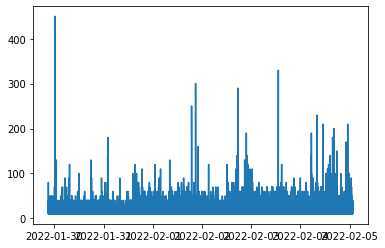

In [11]:
plt.plot(df_eb_2022['timestamp_utc_nanoseconds'], df_eb_2022['Ask1PriceMillionths'] - df_eb_2022['Bid1PriceMillionths'], label='2021')
plt.show()

## VWAP (volume weighted avg price)

$$
VWAP = \frac{\sum_i p_i v_i}{\sum_i v_i}
$$

Utility of VWAP:
1. Assess market sentiment (bullish or bearish?)
2. Optimal entry and exit point
3. Reduce impact of large orders (this is what we are interested in)


$\textbf{VWAP participation algorithm}$
This algo this the quantity as parameters:

Q: target quantity to trade. Q can be positive (buy) or negative (sell). We decide to set Q as 5% of the 65% quantile of the 5 minutes intervall summed volumes of trades. For Q, we chose a propotion so that the trade is $\textbf{liquid enough to be executed}$, and small enough to $\textbf{avoid market impact}$. However, $\textbf{if Q is too small}$ (ie the volume traded is small), then our trade might not be $\textbf{1st in the queue}$ for execution (because the biggest volumes tend to be executed first).;

$\tau_s$: starting time (this is the starting from which we start trading in order to accumulate the target quantity of trade). We should finish before the ending date of the dataset; 

p: target participation rate. We aim to achieve p% of trades done during the trading period. This will not be the actual particpation rate (k) on each trade, because there will be trades we will not take => p<k

k: actual participation rate, i.e when a trade is done, we assume k% of the passive trade was done by us. For example if at time t, the spread was crossed on the bid side, we are then on the bid side (we are not the one who crossed). We will chose k= 1.2p ; 

P : pause time (after each trade, we assume we pause for a time P before doing the next trade)


try different start time, different quantities

The VWAP is the target price we want to achieve

our performance evaluation is : price achieve vs vwap and price achieve vs arrival price


simuler pour chaque arrival time [t0=0,t1,...,tn=T]. pour les t_i ou on n'arrive pas a finir le trade jusqu a la fin, jeter ces simulations.

In [118]:
class Optimisation_execution:
    def __init__(self, data, trade_data, real_participation_rate, starting_time, side, transac_cost, pause_time = pd.Timedelta(seconds=180)):
        self.tau_s = starting_time
        self.data = data[data['timestamp_utc_nanoseconds'] >= self.tau_s].copy()
        
        ## Get trade data after starting time for the right side
        if side == 'bid': ## we accumulate on the buy side => look at sell aggressive trade <0
            mask_bid = (trade_data['Side']<0)
            self.trade_data = trade_data[mask_bid].copy()
        if side == 'ask': ## we accumulate on the sell side => look at buy aggressive trade >0
            mask_ask = (trade_data['Side']>0) #  (trade_data['timestamp_utc_nanoseconds'] >= self.tau_s) &
            self.trade_data = trade_data[mask_ask].copy()
        
        # define the target quantity as 5% of the of 65% quantile of sum of 5 minutes intervall of trade volume
        self.Q = 0.05*self.get_quantile_summed_vol_5_minutes()
        # self.p = target_participation_rate 
        self.k = real_participation_rate ## this the actual participation rate we take on trades, it should be lower than 5%
        self.total_accumulated_qty = 0
        self.total_cost = 0
        self.tau_s = starting_time
        self.pause_time = pause_time
        self.end_time = self.data['timestamp_utc_nanoseconds'].iloc[-1]
        
        ## min size trade
        self.side = side
        self.g = self.get_mimimum_size_threshold(self.side)
        
        self.current_time = self.trade_data.loc[self.trade_data['timestamp_utc_nanoseconds'] >= self.tau_s, 'timestamp_utc_nanoseconds'].iloc[0]
        
        self.fee_rate = transac_cost
        
        ## record of executions
        self.record_executions = pd.DataFrame(columns=['timestamp_utc_nanoseconds', 'PriceMillionths', 'Side', 'Quantity', 'AccumulatedQty', 'AccumulatedCost', 'VWAPMillionths', 'participation_rate'])
        
        
    def add_VWAP(self):
        ## tot_vol is in billionths
        tot_vol = (self.data['Ask1SizeBillionths'] + self.data['Bid1SizeBillionths'] + self.data['Ask2SizeBillionths'] + self.data['Bid2SizeBillionths'])
        ## tot_amount is in millionths of billionths
        tot_amount = (self.data['Ask1PriceMillionths']*self.data['Ask1SizeBillionths'] + self.data['Bid1PriceMillionths']*self.data['Bid1SizeBillionths'] + self.data['Ask2PriceMillionths']*self.data['Ask2SizeBillionths'] + self.data['Bid2PriceMillionths']*self.data['Bid2SizeBillionths'])
        self.data['VWAPMillionths'] = tot_amount/tot_vol
        
    def get_quantile_summed_vol_5_minutes(self, quantile=0.65):
        separate_data_into_5_min_intervals = self.trade_data.groupby(pd.Grouper(key='timestamp_utc_nanoseconds', freq='5Min'))
        ## get sum volumes for each intervall
        summed_vol_5_min = separate_data_into_5_min_intervals['SizeBillionths'].sum()
        ## get quantile of the summed volumes
        vol_quantile = summed_vol_5_min.quantile(0.65)
        return vol_quantile
    
    def get_mimimum_size_threshold(self, side):
        ## we want the min size which correspond to a size where it is unlikely to be 1st in the queue
        ## Therefore, by being above it, we are likely to be 1st in the queue
        ## We choose the min size to be the 5th percentile of the volume traded in the last 5 minutes across the pair's dataset
        min_vol = self.trade_data['SizeBillionths'].quantile(0.05)
        return min_vol
        
    def get_trade_at_given_time(self, side, current_time):   
        temp_data = self.trade_data.loc[self.trade_data['timestamp_utc_nanoseconds'] ==current_time]
        qtty = np.sum(np.maximum(0,temp_data['SizeBillionths']-self.g)*self.k)
        cost = np.sum(np.maximum(0,temp_data['SizeBillionths']-self.g)*self.k*temp_data['PriceMillionths'])/1e9
        
        if self.Q - self.total_accumulated_qty < qtty:
            qtty = self.Q - self.total_accumulated_qty
            cost = qtty*temp_data['PriceMillionths'].iloc[0]/1e9
            
        VWAPMillionths = self.data.loc[self.data['timestamp_utc_nanoseconds'] == current_time, 'VWAPMillionths'].iloc[0]
        participation_rate = qtty/np.sum(temp_data['SizeBillionths'])
        ## update the total accumulated quantity and cost
        self.total_accumulated_qty += qtty
        if side == 'bid':
            self.total_cost += cost  ## positive cost for when buying
        else:
            self.total_cost -= cost
        transaction_cost = cost*self.fee_rate
        self.total_cost += transaction_cost
        
        ## update the record of executions
        new_row = pd.DataFrame({
                                    'timestamp_utc_nanoseconds': [current_time],
                                    'PriceMillionths': [temp_data['PriceMillionths'].iloc[-1]],
                                    'Side': [side],
                                    'Quantity': [qtty],
                                    'AccumulatedQty': [self.total_accumulated_qty],
                                    'AccumulatedCost': [self.total_cost],
                                    'VWAPMillionths': [VWAPMillionths],
                                    'participation_rate': [participation_rate]
                                })
        self.record_executions = pd.concat([self.record_executions, new_row], ignore_index=True)
        
        ## update the current time, get the closest next time
        if qtty == 0: ## if we have no trade, we need to move to the next time
            curr_index = self.trade_data.loc[self.trade_data['timestamp_utc_nanoseconds'] == current_time].index[-1]
            current_time = self.trade_data.loc[curr_index+1, 'timestamp_utc_nanoseconds']
            self.current_time = current_time
        
        else:
            self.current_time = current_time + self.pause_time
            self.current_time = self.trade_data.loc[self.trade_data['timestamp_utc_nanoseconds'] >= self.current_time, 'timestamp_utc_nanoseconds'].iloc[0]
    
    def run_algo(self):
        while self.total_accumulated_qty < self.Q and self.current_time < self.end_time:            
            self.get_trade_at_given_time(self.side, self.current_time)
        ## if we were not able to accumulate the target quantity, we raise an error
        if self.total_accumulated_qty < self.Q:
            raise ValueError("We were not able to accumulate the target quantity strarting from: ", self.tau_s,'ending at: ', self.end_time, 'with an accumulated qtty: ', self.total_accumulated_qty, 'out of a target of: ', self.Q)
        else:    
            return self.record_executions
        
        
        

## Let first try our execution algorithm to see if it works for 

We try it on 2022 ETH BTC data, with Q>0 (i.e on the bid side), starting our execution algorithm from the very first timestamp.

It is recommended to use a pause time between 0.005 and 5 seconds. I choose P=2 seconds.

We have to choose a target participation rate of 3%, and therefore I have: k = 1.2*P = 3.6% which is lower than 5%.



In [119]:
start_time  = df_eb_2022['timestamp_utc_nanoseconds'].iloc[0]
pause_time = pd.Timedelta(seconds=2)
p = 0.03
k = 1.2*p
transac_cost = 0
optim_exec = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'ask', transac_cost, pause_time)
optim_exec.add_VWAP()  # We add the VWAP on the whole dataset
print('the target quantity is: ',optim_exec.Q)
print('the minimum size threshold is: ',optim_exec.g)

the target quantity is:  821962618.75
the minimum size threshold is:  440000.0


## We run the exectution algorithm

For the last trade, I reduce the participation rate (on the trade) to match the exact target quantity Q.

If there is a possible trade where the participation quantity calculated is lower than the minimum size g, then we just move to next timestamp, otherwise, we apply the pause time P

In [120]:
record = optim_exec.run_algo()

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2337157174.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [121]:
display(record)
print('the remaining quantity to achieve the target quantity is: ',optim_exec.Q - optim_exec.total_accumulated_qty, 'Billionths')
count_zero = record[record['Quantity']==0].shape[0]
print('the number of zero trades is: ', count_zero)
non_zero_trades = record[record['Quantity']!=0]
print('the number of trades is :', non_zero_trades.shape[0])
print('the average participation rate on trades we took is: ', np.mean(non_zero_trades['participation_rate']))
print('the average participation rate is: ', np.mean(record['participation_rate']), ' compared to a target of: ', p)

,timestamp_utc_nanoseconds,PriceMillionths,Side,Quantity,AccumulatedQty,AccumulatedCost,VWAPMillionths,participation_rate
0,2022-01-29 21:03:12.993855,67900,ask,6.119604e+06,6.119604e+06,-415.521136,67895.697980,0.035907
1,2022-01-29 21:03:15.671777,67910,ask,1.189562e+06,7.309166e+06,-496.304270,67906.514298,0.035527
2,2022-01-29 21:03:34.881835,67940,ask,1.771538e+08,1.844630e+08,-12532.132613,67954.164402,0.035997
3,2022-01-29 21:03:38.137239,67970,ask,5.636339e+07,2.408263e+08,-16363.152226,67950.164386,0.035990
4,2022-01-29 21:03:41.354740,67980,ask,4.667004e+04,2.408730e+08,-16366.324855,67974.690109,0.026878
...,...,...,...,...,...,...,...,...
59,2022-01-29 21:12:53.178095,68010,ask,1.114992e+04,7.869536e+08,-53501.607309,67997.609098,0.014872
60,2022-01-29 21:13:14.115157,68020,ask,2.568915e+07,8.126428e+08,-55248.816692,68007.778613,0.035956
61,2022-01-29 21:13:56.919992,68020,ask,2.941165e+06,8.155840e+08,-55448.874716,68009.236010,0.035807
62,2022-01-29 21:14:01.427066,68020,ask,1.543730e+05,8.157383e+08,-55459.375170,68021.707878,0.032650


the remaining quantity to achieve the target quantity is:  0.0 Billionths
the number of zero trades is:  2
the number of trades is : 62
the average participation rate on trades we took is:  0.0328479837526584
the average participation rate is:  0.03182148426038782  compared to a target of:  0.03


### Commentary

We can see that we that to achieve our target quantity we needed 62 trades. There was 2 opportunites we did not take because the traded quantity was lower than the minimum size required.

We have a participation rate of 3.18%, whereas our target is 3%. Our participation rate for trades we took is on average 3.28% (lower than 1.2*3% because the quantity is (traded_qtty-min_size) * k) < traded_qtty * k ).

We notice that the price at which we trade is always more interesting (lower if bid, higher if ask) than the VWAP, which makes sense since we never cross the spread (passive trading algorithm)

$\textbf{How to match the desired participation rate?}$

The previous case showed we would have better taken a lower multiple of p for k, for ex 1.15*p. However, it really depends on the dataset and the side, because the number of 'zero trades' (non taken trades because too low quantity) vary

Let try on the lower the actual participation rate to k = 1.12*p (to get a closer participation rate to the target)

In [122]:
p = 0.03
k = 1.12*p
optim_exec = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'ask', transac_cost, pause_time)
optim_exec.add_VWAP()  # We add the VWAP on the whole dataset
print('the target quantity is: ',optim_exec.Q)
print('the minimum size threshold is: ',optim_exec.g)
record = optim_exec.run_algo()
display(record)
print('the remaining quantity to achieve the target quantity is: ',optim_exec.Q - optim_exec.total_accumulated_qty, 'Billionths')
count_zero = record[record['Quantity']==0].shape[0]
print('the number of zero trades is: ', count_zero)
non_zero_trades = record[record['Quantity']!=0]
print('the number of trades is :', non_zero_trades.shape[0])
print('the average participation rate on trades we took is: ', np.mean(non_zero_trades['participation_rate']))
print('the average participation rate is: ', np.mean(record['participation_rate']), ' compared to a target of: ', p)

the target quantity is:  821962618.75
the minimum size threshold is:  440000.0


C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2337157174.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


,timestamp_utc_nanoseconds,PriceMillionths,Side,Quantity,AccumulatedQty,AccumulatedCost,VWAPMillionths,participation_rate
0,2022-01-29 21:03:12.993855,67900,ask,5.711631e+06,5.711631e+06,-387.819727,67895.697980,0.033513
1,2022-01-29 21:03:15.671777,67910,ask,1.110258e+06,6.821888e+06,-463.217318,67906.514298,0.033158
2,2022-01-29 21:03:34.881835,67940,ask,1.653435e+08,1.721654e+08,-11696.657105,67954.164402,0.033597
3,2022-01-29 21:03:38.137239,67970,ask,5.260583e+07,2.247713e+08,-15272.275411,67950.164386,0.033591
4,2022-01-29 21:03:41.354740,67980,ask,4.355870e+04,2.248148e+08,-15275.236531,67974.690109,0.025086
...,...,...,...,...,...,...,...,...
60,2022-01-29 21:13:14.115157,68020,ask,2.397654e+07,7.584666e+08,-51565.562246,68007.778613,0.033559
61,2022-01-29 21:13:56.919992,68020,ask,2.745087e+06,7.612117e+08,-51752.283068,68009.236010,0.033420
62,2022-01-29 21:14:01.427066,68020,ask,1.440815e+05,7.613558e+08,-51762.083492,68021.707878,0.030473
63,2022-01-29 21:14:06.926068,68030,ask,3.188909e+07,7.932449e+08,-53931.498002,68027.377049,0.033569


the remaining quantity to achieve the target quantity is:  0.0 Billionths
the number of zero trades is:  2
the number of trades is : 63
the average participation rate on trades we took is:  0.031087100675691204
the average participation rate is:  0.030130574501054545  compared to a target of:  0.03


As predicted, are participation rate is very close to our objective. However, it does not mean this will work for the bid side, or for other dataset.

Let see how it is on the bid size

In [123]:
p = 0.03
k = 1.12*p
optim_exec = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'bid', transac_cost, pause_time)
optim_exec.add_VWAP()  # We add the VWAP on the whole dataset
print('the target quantity is: ',optim_exec.Q)
print('the minimum size threshold is: ',optim_exec.g)
record = optim_exec.run_algo()
display(record.head())
print('the remaining quantity to achieve the target quantity is: ',optim_exec.Q - optim_exec.total_accumulated_qty, 'Billionths')
count_zero = record[record['Quantity']==0].shape[0]
print('the number of zero trades is: ', count_zero)
non_zero_trades = record[record['Quantity']!=0]
print('the number of trades is :', non_zero_trades.shape[0])
print('the average participation rate on trades we took is: ', np.mean(non_zero_trades['participation_rate']))
print('the average participation rate is: ', np.mean(record['participation_rate']), ' compared to a target of: ', p)

the target quantity is:  673630816.6250001
the minimum size threshold is:  378148.0000000002


C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2337157174.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


,timestamp_utc_nanoseconds,PriceMillionths,Side,Quantity,AccumulatedQty,AccumulatedCost,VWAPMillionths,participation_rate
0,2022-01-29 21:02:56.287757,67880,bid,8.588894e+06,8.588894e+06,583.014140,67898.454088,0.033550
1,2022-01-29 21:03:05.017857,67870,bid,2.497961e+06,1.108686e+07,752.550764,67884.217440,0.033430
2,2022-01-29 21:03:07.304295,67870,bid,8.736306e+05,1.196049e+07,811.844075,67884.187219,0.033118
3,2022-01-29 21:03:25.988929,67930,bid,8.471225e+06,2.043171e+07,1387.294368,67934.670925,0.033550
4,2022-01-29 21:03:46.398791,67960,bid,3.365605e+05,2.076827e+07,1410.167020,67983.038767,0.032378


the remaining quantity to achieve the target quantity is:  0.0 Billionths
the number of zero trades is:  0
the number of trades is : 40
the average participation rate on trades we took is:  0.032654023549624454
the average participation rate is:  0.032654023549624454  compared to a target of:  0.03


We can see that when we don't have zero trade, the participation increases, and therefore in this case we would have to choose a lower multiple of p.

$\textit{For the following, let stay with k = 1.2*p}$

Let see, what would a 'market making' player would do with our trading algorithm, i.e we want to buy Q and sell Q by never crossing the spread. To simulate that, let run a execution algo on the bid and ask side, starting from same timestamp, and then check the costs

In [124]:
## Bid execution algo side
p = 0.03
k = 1.2*p
transac_cost = 0
optim_exec_bid = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'bid', transac_cost, pause_time)
optim_exec_bid.add_VWAP()  # We add the VWAP on the whole dataset
optim_exec_ask = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'ask', transac_cost, pause_time)
optim_exec_ask.add_VWAP()  # We add the VWAP on the whole dataset
record_bid = optim_exec_bid.run_algo()
record_ask = optim_exec_ask.run_algo()

print('total cost for bid side: ', optim_exec_bid.total_cost)
print('total income for ask side: ', optim_exec_ask.total_cost)
print('total pnl: ', -(optim_exec_ask.total_cost + optim_exec_bid.total_cost), 'Millionths dollars')

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2337157174.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


total cost for bid side:  45811.98414268441
total income for ask side:  -55882.75159829139
total pnl:  10070.767455606983 Millionths dollars


We got a low positive total PNL for this timestamp. 

Let add transaction costs of 1e-4 and then let's look at other starting times

In [125]:
## Bid execution algo side
p = 0.03
k = 1.2*p
transac_cost = 0.0001
optim_exec_bid = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'bid', transac_cost, pause_time)
optim_exec_bid.add_VWAP()  # We add the VWAP on the whole dataset
optim_exec_ask = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'ask', transac_cost, pause_time)
optim_exec_ask.add_VWAP()  # We add the VWAP on the whole dataset
record_bid = optim_exec_bid.run_algo()
record_ask = optim_exec_ask.run_algo()

print('total cost for bid side: ', optim_exec_bid.total_cost)
print('total income for ask side: ', optim_exec_ask.total_cost)
print('total pnl: ', -(optim_exec_ask.total_cost + optim_exec_bid.total_cost)/1e6, 'Millionths dollars')

C:\Users\benja\AppData\Local\Temp\ipykernel_25944\2337157174.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


total cost for bid side:  45816.56534109867
total income for ask side:  -55877.163323131594
total pnl:  0.010060597982032923 Millionths dollars


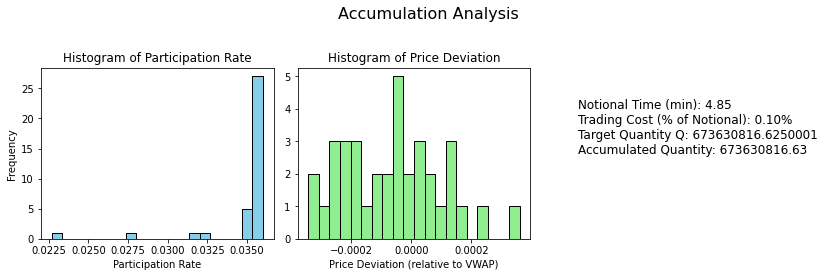

{'notional_time_minutes': 4.85392245, 'cost_proportion': 0.0010003786465304242}

In [126]:
def analyze_accumulation(record_executions, tau_s, Q):

    record_executions['datetime'] = pd.to_datetime(record_executions['timestamp_utc_nanoseconds'])
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(record_executions['participation_rate'], bins=20, color='skyblue', edgecolor='k')
    plt.xlabel("Participation Rate")
    plt.ylabel("Frequency")
    plt.title("Histogram of Participation Rate")
    
    record_executions['execution_price'] = record_executions['PriceMillionths'] / 1e6
    record_executions['VWAP'] = record_executions['VWAPMillionths'] / 1e6
    record_executions['price_deviation'] = (record_executions['execution_price'] - record_executions['VWAP']) / record_executions['VWAP']
    
    plt.subplot(1, 3, 2)
    plt.hist(record_executions['price_deviation'].dropna(), bins=20, color='lightgreen', edgecolor='k')
    plt.xlabel("Price Deviation (relative to VWAP)")
    plt.title("Histogram of Price Deviation")
    
    final_time = record_executions['datetime'].max()
    arrival_time = pd.to_datetime(tau_s)
    notional_time = (final_time - arrival_time).total_seconds() / 60.0  # in minutes
    
    total_cost = record_executions['AccumulatedCost'].iloc[-1]
    avg_exec_price = record_executions['execution_price'].mean()
    notional = record_executions['AccumulatedQty'].iloc[-1] * avg_exec_price
    cost_proportion = total_cost / notional if notional != 0 else np.nan
    
    # Plot summary metrics as text on the third subplot.
    plt.subplot(1, 3, 3)
    plt.axis('off')
    summary_text = f"Notional Time (min): {notional_time:.2f}\n" \
                   f"Trading Cost (% of Notional): {cost_proportion*100:.2f}%\n" \
                   f"Target Quantity Q: {Q}\n" \
                   f"Accumulated Quantity: {record_executions['AccumulatedQty'].iloc[-1]:.2f}"
    plt.text(0.1, 0.5, summary_text, fontsize=12)
    
    plt.suptitle("Accumulation Analysis", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    return {"notional_time_minutes": notional_time, "cost_proportion": cost_proportion}

analyze_accumulation(record_bid, start_time, optim_exec_bid.Q)

### Commentary

The plot provides an **Accumulation Analysis**, which includes:

1. **Histogram of Participation Rate**:
   - The participation rate is mostly clustered around **0.035 (3.5%)**.
   - A few instances exist at much lower values, but the concentration is strongly at **0.035**.

2. **Histogram of Price Deviation**:
   - Price deviations relative to VWAP (Volume Weighted Average Price) are symmetrically distributed around **zero**.
   - The range of deviations is quite small, mostly between **-0.0002 and 0.0002**.

3. **Summary Statistics**:
   - **Notional Time**: **4.85 minutes**, indicating a quick execution.
   - **Trading Cost**: **0.10% of notional**, which is relatively low.
   - **Target and Accumulated Quantity**: **673,630,816.63 units**, suggesting full execution.

### **Implications for Bid Size**
- Since the participation rate is **highly concentrated at 3.5%**, it implies a **consistent bid size**, meaning orders are placed at a steady rate.
- The **low trading cost (0.10%)** and minimal **price deviation** suggest that the bid size is well-calibrated to market liquidity, preventing major price slippage.
- The **execution efficiency** (targeted and accumulated quantities are nearly identical) confirms that the bid size is effective in achieving the desired trade execution without market impact.

Would you like to analyze specific aspects such as market impact further?

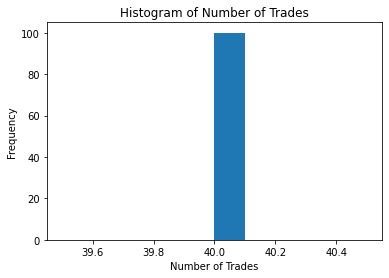

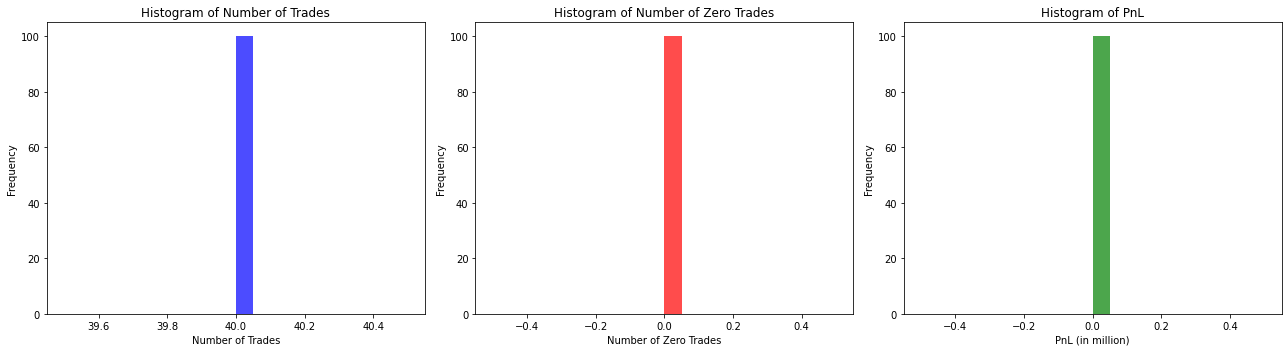

Average Execution Time: [Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 days 00:00:00.000000005'), Timedelta('0 da

In [130]:
## select a list of 100  starting time in the dataset eqally spaced
start_times = df_eb_2022['timestamp_utc_nanoseconds'].unique()  
start_times = np.sort(start_times)
start_times = start_times[::len(start_times)//100]
start_times = start_times[:100]
## set params
## Bid execution algo side
p = 0.03
k = 1.2*p
transac_cost = 0
pause_time = pd.Timedelta(seconds=2)

## We analyze results for bid only, except pnl
list_start_times = []
list_avg_exec_time = []
list_pnl = []
list_notional_time = []
list_nb_trades = []
list_nb_zero_trades = []

for start_time in start_times:
    try:
        optim_exec_bid = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'bid', transac_cost, pause_time)
        optim_exec.add_VWAP()  
        record_bid = optim_exec.run_algo()
        optim_exec_ask = Optimisation_execution(df_eb_2022, df_eb_trades_2022, k, start_time, 'ask', transac_cost, pause_time)
        optim_exec.add_VWAP() 
        record_ask = optim_exec.run_algo()
        execution_time = (record['timestamp_utc_nanoseconds'].iloc[-1] - record['timestamp_utc_nanoseconds'].iloc[0]) / 1e9 / 60  # Convert nanoseconds to minutes
        pnl = -(optim_exec_ask.total_cost + optim_exec_bid.total_cost)
        list_start_times.append(start_time)
        list_avg_exec_time.append(execution_time)
        count_zero = record_bid[record_bid['Quantity']==0].shape[0]
        list_nb_trades.append(record_bid.shape[0]  - count_zero)
        list_pnl.append(pnl)
        list_nb_zero_trades.append(count_zero)
            
    except ValueError as e:
        print(e)
        
plt.hist(list_nb_trades
         )
plt.xlabel("Number of Trades")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Trades")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of Number of Trades
axes[0].hist(list_nb_trades, bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel("Number of Trades")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Number of Trades")

# Histogram of Zero Trades
axes[1].hist(list_nb_zero_trades, bins=20, color='red', alpha=0.7)
axes[1].set_xlabel("Number of Zero Trades")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Number of Zero Trades")

# Histogram of PnL
axes[2].hist(list_pnl, bins=20, color='green', alpha=0.7)
axes[2].set_xlabel("PnL (in million)")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Histogram of PnL")

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Average Execution Time: {list_avg_exec_time} minutes")
print(f"Median Execution Time: {np.median(list_avg_exec_time)} minutes")
print(f"Average Number of Trades: {np.mean(list_nb_trades)}")
print(f"Average Number of Zero Trades: {np.mean(list_nb_zero_trades)}")
print(f"Average PnL: {np.mean(list_pnl)} millionth")

    

There is apparently an issue with the simulation for multiple starting time. Unfortunatly I am running out of time so I cannot solve this issue. Above is what I would do next if I had  more time

## To do next?

1. $\textbf{Comparative Analysis with Other Metrics}$

Impact Cost vs. Participation Rate: Compare trading cost as a % of notional vs. different participation rates.

Execution Time vs. Market Volatility: Check if longer execution times correlate with higher price deviation.

Order Book Imbalance: Analyze how bid-ask imbalance affects execution performance.

Slippage & Spread Impact: Measure slippage compared to the quoted spread at execution moments.

2. $\textbf{Compare with Other Execution Strategies}$

TWAP (Time-Weighted Average Price): Execute equal-sized trades over time and compare performance.

VWAP (Volume-Weighted Average Price): Execute orders proportionally to market volume.

POV (Percentage of Volume): Compare execution when targeting a set participation rate.

Implementation Shortfall: Measure the cost difference between ideal execution (mid-price at start) and actual execution.

3. $\textbf{Improve Execution Algorithm}$

Adaptive Participation Rate: Adjust participation dynamically based on liquidity & volatility.


Market Conditions Awareness: Pause execution during low-liquidity periods or high volatility.